In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#import datasets
abortion_df = pd.read_json('cleanedAbortiondata.json')
brate_df = pd.read_json('cleanedBirthRate.json')

In [ ]:
abortion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   191 non-null    object
 1   legality  191 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [ ]:
brate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        2576 non-null   int64  
 1   Region      2576 non-null   object 
 2   Country     2576 non-null   object 
 3   Birth rate  2576 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 80.6+ KB


In [ ]:
avg_brate = brate_df.groupby(['Country'])['Birth rate'].mean()
avg_brate = avg_brate.reset_index(name = 'Avg. Birth rate')

In [ ]:
#changing column name to 'Country' in Abortion law dataset 
abortion_df = abortion_df.rename(columns={'country': 'Country'})

In [ ]:
abortion_df.head()

,Country,legality
0,Afghanistan,To save a woman's life
1,Albania,No restriction
2,Algeria,To preserve physical/mental health
3,Andorra,Prohibited altogether
4,Angola,Prohibited altogether


In [ ]:
#countries categorized as per the abortion law
abortion_df.groupby(['legality']).size()

legality
No restriction                                 56
Prohibited altogether                          25
To preserve health/on socioeconomic grounds    13
To preserve physical health                    36
To preserve physical/mental health             23
To save a woman's life                         37
Varies by state                                 1
dtype: int64

 **Observation:**
* More than one-fourth of the countries have no restrictions on abortion. 
* Majority of the countries have Condition-based abortions: based on physical/mental health and/or socio-economic grounds.
* 25 out of 191 countries have banned abortion altogether. 

In [ ]:
brate_abortion = pd.merge(abortion_df, avg_brate, on='Country')

In [ ]:
brate_abortion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 185
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          186 non-null    object 
 1   legality         186 non-null    object 
 2   Avg. Birth rate  186 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.8+ KB


In [ ]:
# To find the missing countries in Birth rate data set
for a in list(abortion_df['Country']):
  if(a in list(avg_brate['Country'])):
    pass
  else:
    print(a)

Hong Kong
Ivory Coast
Liechtenstein
Monaco
Taiwan


In [ ]:
brate_abortion.describe()

,Avg. Birth rate
count,186.000000
mean,56.140732
std,46.252385
min,1.000000
25%,16.643421
50%,46.867857
75%,83.398482
max,187.460000


Top 10 highest birth rate and their abortion law

In [ ]:
brate_abortion.sort_values(by='Avg. Birth rate', ascending=False).head(10)

,Country,legality,Avg. Birth rate
116,Niger,To preserve physical health,187.460000
31,Central African Republic,To preserve physical health,182.066667
108,Mozambique,To preserve physical/mental health,180.040000
32,Chad,To preserve physical health,179.780000
49,Equatorial Guinea,To preserve physical health,177.500000
97,Mali,To save a woman's life,177.420000
4,Angola,Prohibited altogether,167.290000
154,South Sudan,To save a woman's life,159.400000
94,Malawi,To save a woman's life,153.706250
93,Madagascar,Prohibited altogether,151.184615


Average birth rate over 100 and abortion law with restrictions

In [ ]:
avg_over_100 = brate_abortion[brate_abortion['Avg. Birth rate'] > 100 ]

In [ ]:
with_res_over_100 = avg_over_100[avg_over_100['legality'] != 'No restriction']

In [ ]:
with_res_over_100

,Country,legality,Avg. Birth rate
0,Afghanistan,To save a woman's life,114.591667
4,Angola,Prohibited altogether,167.290000
13,Bangladesh,To save a woman's life,113.558824
18,Benin,To preserve physical health,101.350000
25,Burkina Faso,To preserve physical health,129.410000
28,Cameroon,To preserve physical health,130.400000
31,Central African Republic,To preserve physical health,182.066667
32,Chad,To preserve physical health,179.780000
45,Democratic Republic of the Congo,Prohibited altogether,122.730769
49,Equatorial Guinea,To preserve physical health,177.500000


There are 31 countries with birth rate above 100 that have restrictions in their abortion laws

Pie-chart based on Legality for countries high birth rate and restricted abortion

In [ ]:
country_count_law_wise_hbr = with_res_over_100.groupby(['legality']).size()
country_count_law_wise_hbr = country_count_law_wise_hbr.reset_index(name = 'Country count')

In [ ]:
country_count_law_wise_hbr

,legality,Country count
0,Prohibited altogether,8
1,To preserve health/on socioeconomic grounds,1
2,To preserve physical health,9
3,To preserve physical/mental health,3
4,To save a woman's life,10


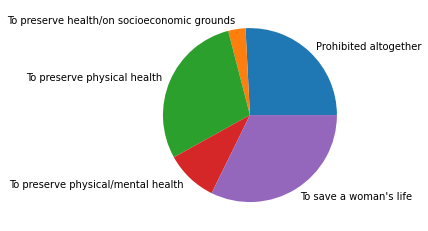

In [ ]:
plt.pie(list(country_count_law_wise_hbr['Country count']), labels = list(country_count_law_wise_hbr['legality']))
plt.show() 

Average birth rate less than 10 and abortion law with no restrictions

In [ ]:
avg_under_10 = brate_abortion[brate_abortion['Avg. Birth rate'] < 10 ]
with_res_under_10 = avg_under_10[avg_under_10['legality'] == 'No restriction']

In [ ]:
with_res_under_10

,Country,legality,Avg. Birth rate
9,Austria,No restriction,9.873684
16,Belgium,No restriction,8.794737
41,Denmark,No restriction,3.857895
56,France,No restriction,7.216667
59,Germany,No restriction,9.310526
61,Greece,No restriction,9.670000
76,Italy,No restriction,6.084211
92,Luxembourg,No restriction,7.700000
113,Netherlands,No restriction,4.700000
118,Democratic People's Republic of Korea,No restriction,1.000000


There are 17 countries with birth rate under 10 that have no restrictions in their abortion laws

Do all countries with no abortion restrictions have a lower birth rate?

In [ ]:
no_res_df =  brate_abortion[brate_abortion['legality']  == 'No restriction']

In [ ]:
no_res_df

,Country,legality,Avg. Birth rate
1,Albania,No restriction,18.318750
7,Armenia,No restriction,25.194444
8,Australia,No restriction,14.778947
9,Austria,No restriction,9.873684
10,Azerbaijan,No restriction,45.188889
12,Bahrain,No restriction,13.647059
15,Belarus,No restriction,20.766667
16,Belgium,No restriction,8.794737
21,Bosnia and Herzegovina,No restriction,13.752632
24,Bulgaria,No restriction,41.178947


In [ ]:
less_than_50 = no_res_df[no_res_df['Avg. Birth rate'] < 50]
percent_less_than_50 =  (less_than_50['Country'].size * 100) / no_res_df['Country'].size
percent_less_than_50

91.07142857142857

91% of the countries with no abortion restrictions have adolescent birth rates less than 50.

In [ ]:
over_100_no_res = no_res_df[no_res_df['Avg. Birth rate'] > 100]
print('Countries with no restrictions that have birth rate higher than 100:', over_100_no_res)

Countries with no restrictions that have birth rate higher than 100: Empty DataFrame
Columns: [Country, legality, Avg. Birth rate]
Index: []


Hence, the countries with no abortion restrictions have birth rates less than 100 

In [ ]:
with_res = brate_abortion[brate_abortion['legality']  != 'No restriction']
with_res_percent = (with_res_over_100['Country'].size * 100) / with_res['Country'].size
with_res_percent

23.846153846153847